# **TTI109 - Estatística**
# **Aula 04 - Estatística Descritiva 03**
# **Exercícios resolvidos**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## **Exercício 02 - Falhas de energia**

Para cada conjunto de dados a seguir encontre a média, a mediana e a moda dos dados (se possível). Se quaisquer dessas medidas não puderem ser encontradas ou não representarem o centro dos dados, explique o porquê.

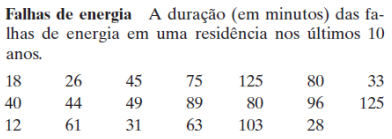

In [3]:
# Construção do conjunto de dados
falhas = pd.Series([18, 26, 45, 75, 125, 80, 33,
                    40, 44, 49, 89, 80, 96, 125,
                    12, 61, 31, 63, 103, 28])

In [4]:
# Cálculo das medidas centrais
media = falhas.mean()
mediana = falhas.median()
modas = falhas.mode()
num_modas = len(modas)
print(f'Tempo médio das falhas = {media:.1f} minutos')
print(f'Tempo mediano das falhas = {mediana:.1f} minutos')
if num_modas == 0:
  print('Não há moda na distribuição')
else:
  print('Modas registradas:')
  for moda in modas:
    print(f'{moda} minutos')

Tempo médio das falhas = 14.8 minutos
Tempo mediano das falhas = 15.0 minutos
Modas registradas:
16 minutos


## **Exercício 03 - Item (a)**

Explique qual a medida central é mais adequada para descrever as respostas de uma amostra de $1000$ adultos que foram indagados sobre qual tipo de lente corretiva eles usavam (Adaptado de: *American Optometric Association*). Calcule essa medida.

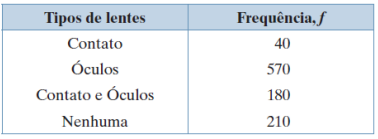

*Resposta:* Não há sentido em determinar a média ou a mediana entre as categorias *Contato*, *Óculos*, *Contato e Óculos* e *Nenhuma*. Dessa forma, a moda é a medida central mais adequada. Nesse caso, a moda revela que o tipo mais usado de lentes corretivas são os óculos, com proporção de $57\%$ dentre os entrevistados.

## **Exercício 05 - Nota final**

Determine a média ponderada do conjunto de dados:

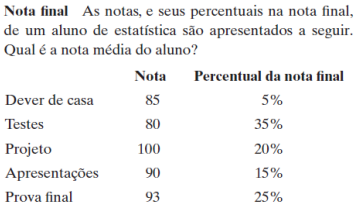

In [5]:
# Construção do conjunto de dados
notas = pd.DataFrame({'Nota': [85, 80, 100, 90, 93],
                      '% Nota Final': [5, 35, 20, 15, 25]})
notas.index = ['Dever de casa', 'Testes', 'Projeto', 'Apresentações', 'Prova Final']
display(notas)

,Nota,% Nota Final
Dever de casa,85,5
Testes,80,35
Projeto,100,20
Apresentações,90,15
Prova Final,93,25


In [6]:
# Cálculo da média ponderada
# Opção 1 - Usando a definição
media_ponderada = sum(notas['Nota'] * notas['% Nota Final']) / 100
print(f'A média final é {media_ponderada}.')

A média final é 89.0.


In [7]:
# Cálculo da média ponderada
# Opção 2 - Usando o numpy
media_ponderada = np.average(a=notas['Nota'], weights=notas['% Nota Final'])
print(f'A média final é {media_ponderada}.')

A média final é 89.0.


## **Exercício 09**

*Análise de dados:* Um serviço de teste ao
consumidor obteve as distâncias percorridas (em milhas por
galão), mostradas na tabela abaixo, em cinco testes de
desempenho com três tipos de carros compactos.

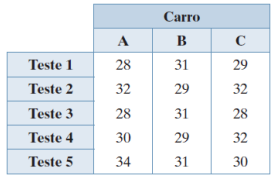

**(a)** O fabricante do carro $A$ quer anunciar que seu carro teve o melhor desempenho no teste. Que medida da tendência central — média, mediana ou moda — deveria ser usada para essa
afirmação? Explique seu raciocínio.

**(b)** Idem, para o fabricante do carro $B$.

**(c)** Idem, para o fabricante do carro $C$.

In [8]:
# Construção do conjunto de dados
testes = pd.DataFrame({'Carro A': [28, 32, 28, 30, 34],
                       'Carro B': [31, 29, 31, 29, 31],
                       'Carro C': [29, 32, 28, 32, 30]})
testes.index = [f'Teste {i}' for i in range(1, 6)]
display(testes)

,Carro A,Carro B,Carro C
Teste 1,28,31,29
Teste 2,32,29,32
Teste 3,28,31,28
Teste 4,30,29,32
Teste 5,34,31,30


In [27]:
# Opção 1
# Cálculo das medidas centrais, uma a uma

# Carro A
media_A = testes['Carro A'].mean()
mediana_A = testes['Carro A'].median()
moda_A = testes['Carro A'].mode()
print('Carro A:')
print(f'Média = {media_A:.1f} mi/gl')
print(f'Mediana = {mediana_A:.1f} mi/gl')
print(f'Moda = {moda_A[0]:.1f} mi/gl')

# Carro B
media_B = testes['Carro B'].mean()
mediana_B = testes['Carro B'].median()
moda_B = testes['Carro B'].mode()
print('\nCarro B:')
print(f'Média = {media_B:.1f} mi/gl')
print(f'Mediana = {mediana_B:.1f} mi/gl')
print(f'Moda = {moda_B[0]:.1f} mi/gl')

# Carro C
media_C = testes['Carro C'].mean()
mediana_C = testes['Carro C'].median()
moda_C = testes['Carro C'].mode()
print('\nCarro C:')
print(f'Média = {media_C:.1f} mi/gl')
print(f'Mediana = {mediana_C:.1f} mi/gl')
print(f'Moda = {moda_C[0]:.1f} mi/gl')

Carro A:
Média = 30.4 mi/gl
Mediana = 30.0 mi/gl
Moda = 28.0 mi/gl

Carro B:
Média = 30.2 mi/gl
Mediana = 31.0 mi/gl
Moda = 31.0 mi/gl

Carro C:
Média = 30.2 mi/gl
Mediana = 30.0 mi/gl
Moda = 32.0 mi/gl


In [22]:
# Opção 2
# Cálculo das medidas centrais, usando o método agg
medidas = testes.agg(['mean', 'median'])
modas = testes.agg(lambda x: x.mode() if not x.isna().all() else np.nan)
medidas = pd.concat([medidas, modas])
medidas.index = ['Média', 'Mediana', 'Moda']
display(medidas)

,Carro A,Carro B,Carro C
Média,30.4,30.2,30.2
Mediana,30.0,31.0,30.0
Moda,28.0,31.0,32.0


*Análise:*

* O fabricante do carro $A$ deve utilizar a média e publicar um anúncio afirmando que seu consumo médio de $30,4$ mi/gl é superior ao de seus concorrentes.

* O fabricante do carro $B$ deve utilizar a mediana e publicar um anúncio afirmando que seu consumo mediano de $30,4$ mi/gl é superior ao de seus concorrentes.

* O fabricante do carro $C$ deve utilizar a moda e publicar um anúncio afirmando que seu consumo médio de $32,0$ mi/gl é superior ao de seus concorrentes.